In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import random
from sklearn.decomposition import PCA

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
#Standardise the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255 
X_test/=255

# Model Training

In [6]:
#Model
#encoder
input_img = tf.keras.layers.Input(shape=(32, 32, 3))

encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(input_img)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Flatten()(encoder)
encoder = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)
encoder_out = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)

#decoder
decoder_mul = tf.keras.layers.Dense(4*4*128)(encoder_out)
decoder_reshape = tf.keras.layers.Reshape((4,4,128))(decoder_mul)
decoder = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder_reshape)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Dropout(0.5)(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Dropout(0.5)(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3,3), strides=1, activation=None, padding='same')(decoder)
decoder = tf.keras.layers.Activation('sigmoid')(decoder)

In [7]:
autoencoder = tf.keras.models.Model(input_img, decoder)
encoder = tf.keras.models.Model(input_img, encoder)
encoded_input = tf.keras.layers.Input(shape=(4, 4, 128))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input,decoder_layer(encoded_input))

In [8]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)       

In [9]:
autoencoder.compile(loss='mean_squared_error', optimizer='Adam')
history = autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=512,epochs=100)

Epoch 1/100
98/98 [==============================] - 10s 104ms/step - loss: 1.0529 - val_loss: 0.3106
Epoch 2/100
98/98 [==============================] - 9s 94ms/step - loss: 0.1195 - val_loss: 0.1115
Epoch 3/100
98/98 [==============================] - 9s 96ms/step - loss: 0.0320 - val_loss: 0.0823
Epoch 4/100
98/98 [==============================] - 9s 96ms/step - loss: 0.0235 - val_loss: 0.0778
Epoch 5/100
98/98 [==============================] - 9s 96ms/step - loss: 0.0218 - val_loss: 0.0473
Epoch 6/100
98/98 [==============================] - 9s 95ms/step - loss: 0.0215 - val_loss: 0.0509
Epoch 7/100
98/98 [==============================] - 9s 94ms/step - loss: 0.0199 - val_loss: 0.0479
Epoch 8/100
98/98 [==============================] - 9s 93ms/step - loss: 0.0194 - val_loss: 0.0207
Epoch 9/100
98/98 [==============================] - 9s 94ms/step - loss: 0.0178 - val_loss: 0.0314
Epoch 10/100
98/98 [==============================] - 9s 94ms/step - loss: 0.0172 - val_loss: 0.02

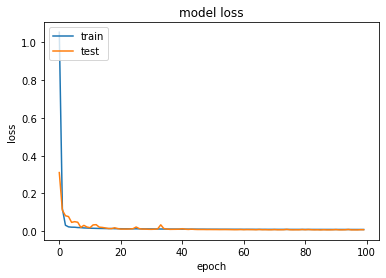

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Image Clustering

In [11]:
decoded_imgs = autoencoder.predict(X_test)

In [12]:
encoder2 = tf.keras.models.Model(input_img,encoder_out)
decoded = encoder2.predict(X_test)  

In [13]:
decoded.shape

(10000, 256)

In [30]:
#an attempt to reduce the dimensions so that k-means clustering can work better
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(decoded)

In [31]:
#K-means
km=KMeans(n_clusters=10,init='k-means++',max_iter=1000)
clustered_images = km.fit_predict(principalComponents)

In [32]:
for cluster in range(10):
    print('cluster: ', cluster)
    a = np.array(Y_test[np.where(clustered_images == cluster)])
    print(np.bincount(a[:,0]))
    print("Probable cluster label : ",np.argmax(np.bincount(a[:,0])))

cluster:  0
[ 62 193  59 110  38 195  68  92 126 108]
Probable cluster label :  5
cluster:  1
[ 15  93  55 123  76 134 117  88  33  35]
Probable cluster label :  5
cluster:  2
[ 83 105 209 230 306 191 327 206  71  86]
Probable cluster label :  6
cluster:  3
[129  89  53  56   9  39  47  43  22  79]
Probable cluster label :  0
cluster:  4
[103 173  40  30  24  21  15 100 250 331]
Probable cluster label :  9
cluster:  5
[ 20 122  35  63  17  44  23  37  46 113]
Probable cluster label :  1
cluster:  6
[ 64  97  61 122  63 124  71 194  31 139]
Probable cluster label :  7
cluster:  7
[321  63 138 102  84 102  66 116 228  77]
Probable cluster label :  0
cluster:  8
[10 38 31 56 18 48 31 29 11  7]
Probable cluster label :  3
cluster:  9
[193  27 319 108 365 102 235  95 182  25]
Probable cluster label :  4


In [28]:
copy=clustered_images

Class  0


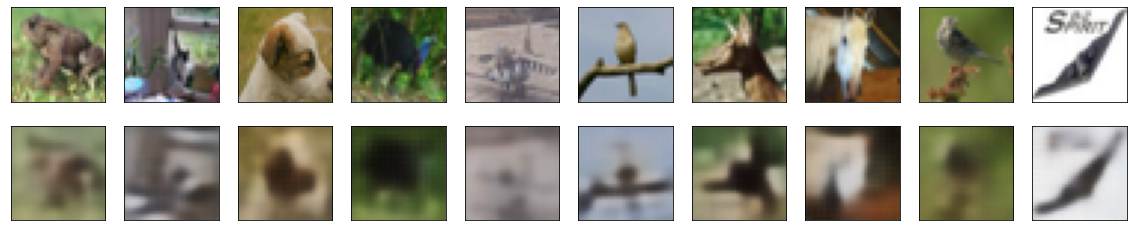

Class  1


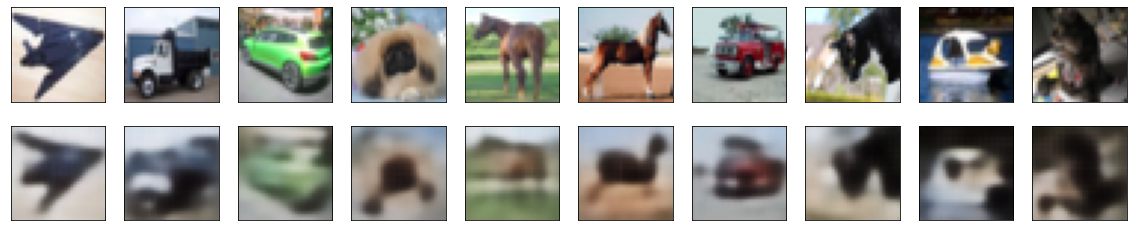

Class  2


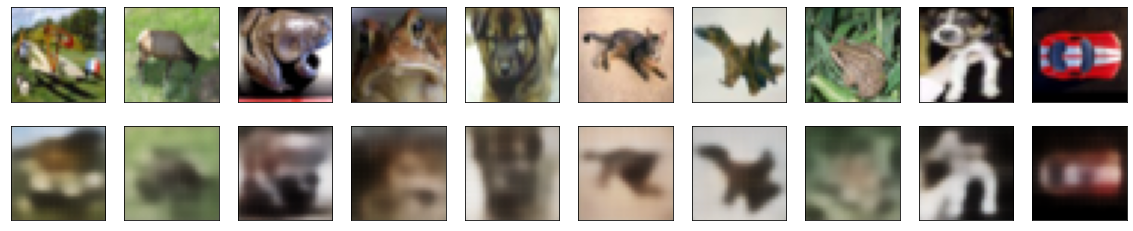

Class  3


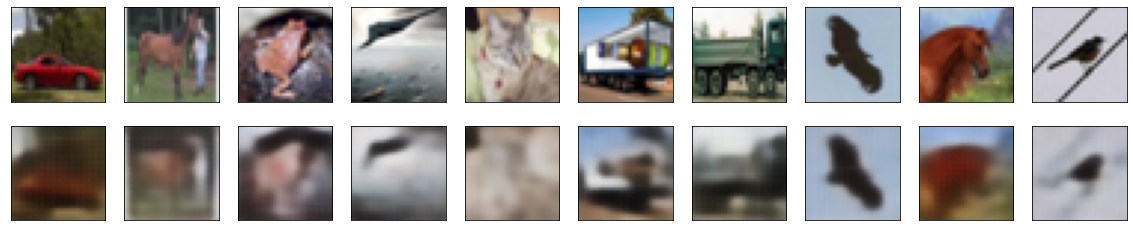

Class  4


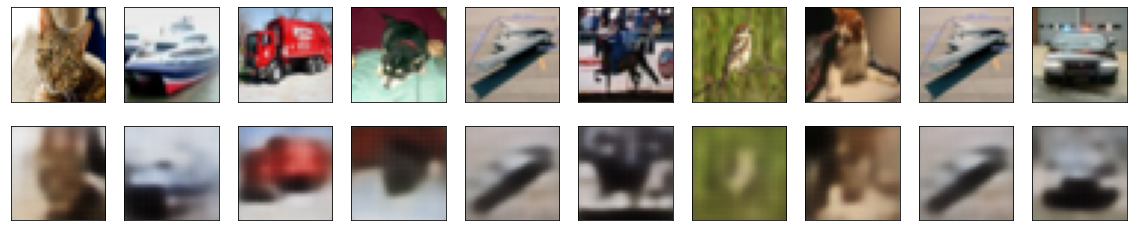

Class  5


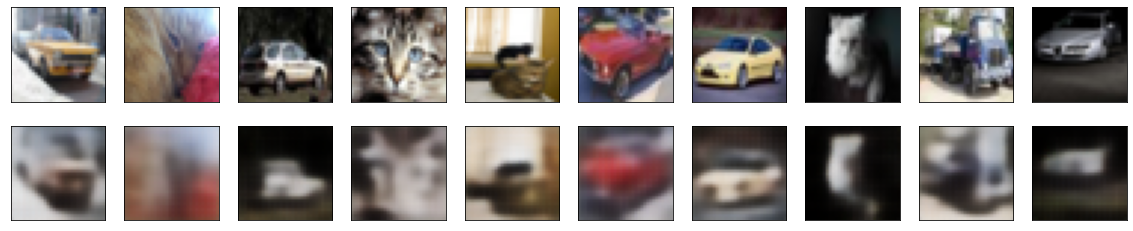

Class  6


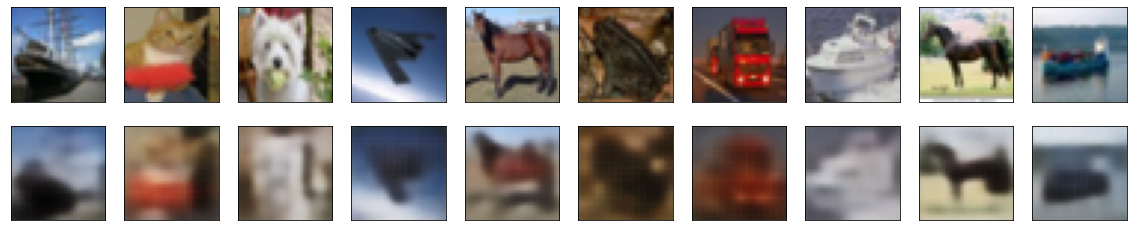

Class  7


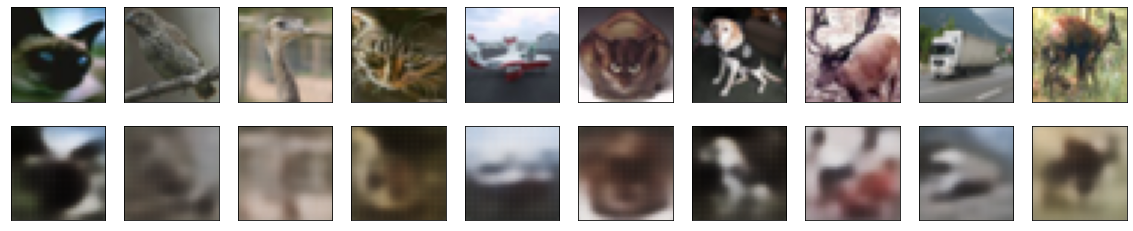

Class  8


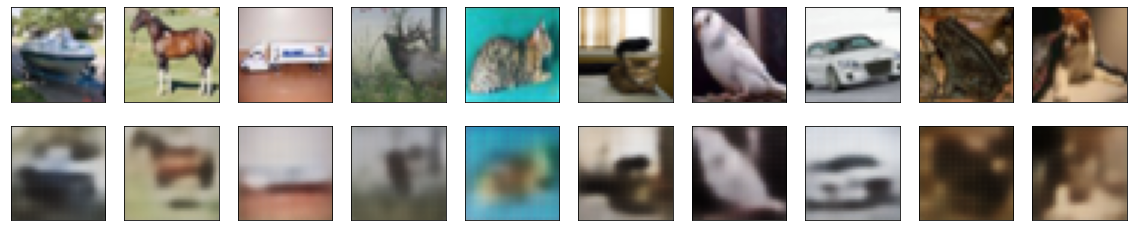

Class  9


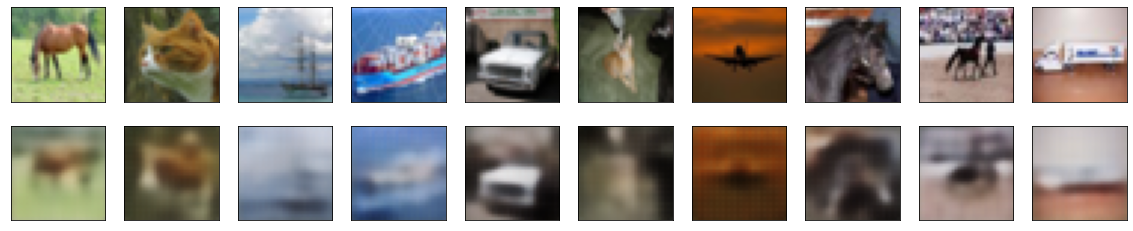

In [29]:
for i in range(10):
    n = 10
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    plt.figure(figsize=(20, 4))
    for j in range(n):
        # display original
        pos = random.randint(0,np.size(indices))
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos].reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos].reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()

The results of K-means is not really satisfactory. The images are more or less evenly distributed with no real majority in the cluster(>50% of the cluster size).There are a few classes that have not been represented.Perhaps using a more robust clustering algorithm for images might be needed.There is a major scope for improvement.